In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [88]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [89]:
# to get only columns from [Age	,EstimatedSalary,	Purchased]
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

In [91]:
# x=df.drop(columns=['Purchased'],axis=1)
# x


In [92]:
# y=df['Purchased']
# y

In [93]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (280, 2)
X_test shape: (120, 2)
y_train shape: (280,)
y_test shape: (120,)


In [94]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [95]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [96]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [97]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

# StandardScaler

In [98]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()



In [99]:
# Fit the training data
scalar.fit(x_train)
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)


In [100]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [101]:
x_train
# data phle dataframe mei tha jo ki pandas mei h

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [102]:
x_train_scaled
# ab data numpy mei hogya isko aab dataframe mei krna hoga

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [103]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [104]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [105]:
np.round(x_train.describe())
# before scaling the x_train mean is 38.0 and std is 10

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [106]:
np.round(x_train_scaled.describe())
# after scaling the x_train_scaled mean is 0 and std is 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


Text(0.5, 1.0, 'after Scaling')

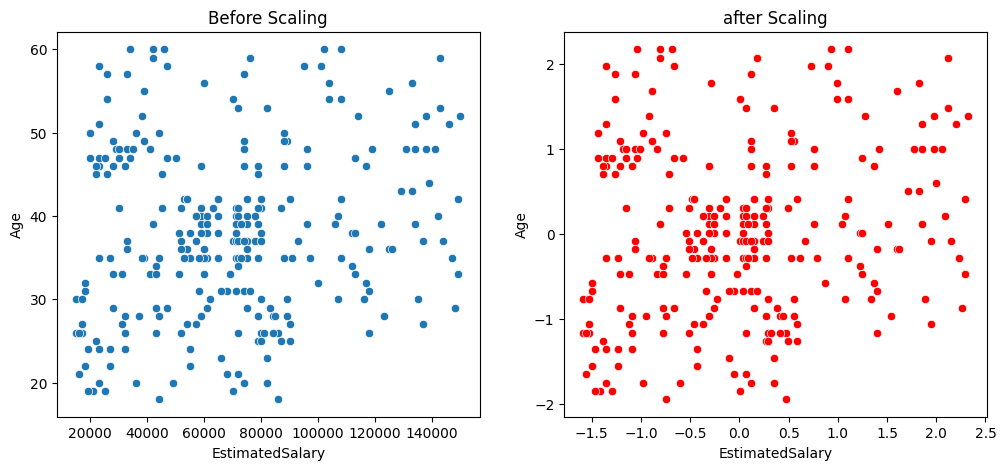

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=x_train['EstimatedSalary'],y=x_train['Age'],ax=axes[0])
axes[0].set_title("Before Scaling")
sns.scatterplot(x=x_train_scaled['EstimatedSalary'],y=x_train_scaled['Age'],ax=axes[1],color='red')
axes[1].set_title("after Scaling")
# see the estimated salary after scaling becomes in the range of -1 to 1 this is called standarization

In [126]:
fig, axes(0,1) = plt.subplots(ncols=2 figsize=(12, 5))
sns.kdeplot(x=x_train['EstimatedSalary'],ax=axes[0])
sns.kdeplot(y=x_train['Age'],ax=axes[0])

sns.kdeplot(y=x_train_scaled['Age'],ax=axes[1])
sns.kdeplot(x=x_train_scaled['EstimatedSalary'],ax=axes[1])



SyntaxError: invalid syntax. Perhaps you forgot a comma? (3082487465.py, line 1)

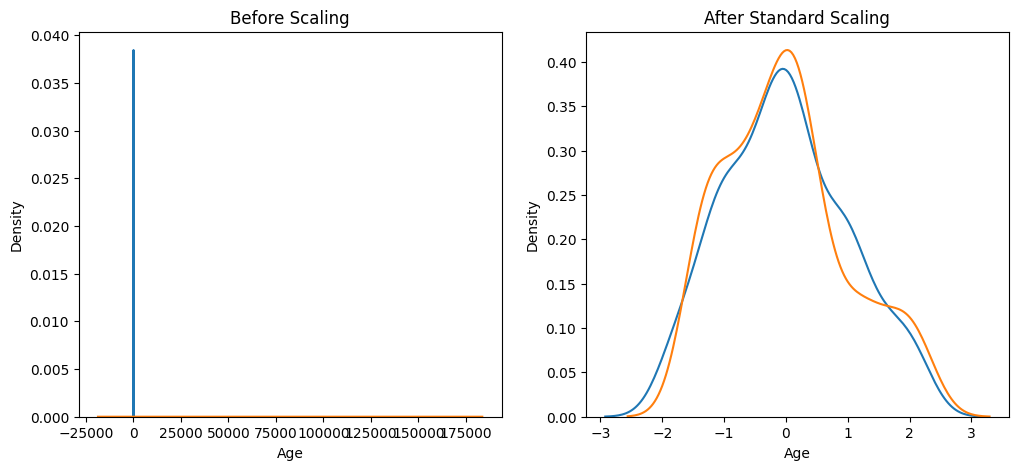

In [125]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
# before scaling
ax[0].set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax[0])
sns.kdeplot(x_train['EstimatedSalary'], ax=ax[0])

# after scaling
ax[1].set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax[1])
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax[1])
plt.show()